<a href="https://colab.research.google.com/github/adrian5520/Machine-learning-/blob/main/basics_project/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.set_printoptions(precision=6, suppress=True, edgeitems=10, linewidth=100000, 
                    formatter=dict(float=lambda x: f'{x:.2f}'))
np.random.seed(42)

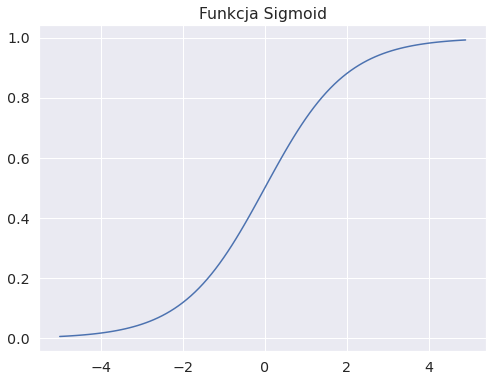

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)

plt.figure(figsize=(8, 6))
plt.plot(X, y)
plt.title('Funkcja Sigmoid')
plt.show()

In [11]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
raw_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(raw_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
all_data = raw_data.copy()

data = all_data['data']
target = all_data['target']

print(f'rozmiar danych: {data.shape}')
print(f'rozmiar targetL {target.shape}')

rozmiar danych: (569, 30)
rozmiar targetL (569,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (426, 30)
y_train shape: (426,)
X_test shape: (143, 30)
y_test shape: (143,)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
scaler.mean_

array([14.18, 19.42, 92.38, 660.94, 0.10, 0.11, 0.09, 0.05, 0.18, 0.06, 0.42, 1.22, 2.94, 41.88, 0.01, 0.03, 0.03, 0.01, 0.02, 0.00, 16.34, 25.75, 107.78, 889.48, 0.13, 0.26, 0.27, 0.11, 0.29, 0.08])

In [17]:
scaler.scale_

array([3.56, 4.38, 24.67, 359.98, 0.01, 0.05, 0.08, 0.04, 0.03, 0.01, 0.29, 0.53, 2.17, 48.84, 0.00, 0.02, 0.03, 0.01, 0.01, 0.00, 4.88, 6.14, 34.24, 576.75, 0.02, 0.16, 0.21, 0.07, 0.06, 0.02])

In [18]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = log_reg.predict(X_test)
y_pred[:30]

array([1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [20]:
y_prob = log_reg.predict_proba(X_test)
y_prob[:30]

array([[0.02, 0.98],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00],
       [0.10, 0.90],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.17, 0.83],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.12, 0.88],
       [0.02, 0.98],
       [0.05, 0.95],
       [1.00, 0.00],
       [0.00, 1.00],
       [1.00, 0.00],
       [0.88, 0.12],
       [0.01, 0.99],
       [0.03, 0.97],
       [0.03, 0.97],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.52, 0.48],
       [0.00, 1.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.00, 1.00],
       [0.00, 1.00]])

Accuracy: 0.972027972027972


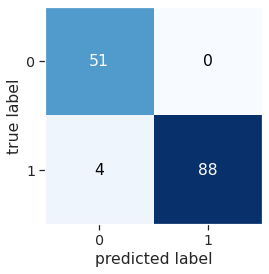

In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm)

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

In [22]:
def plot_confusion_matrix(cm):
    # klasyfikacja binarna
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=['pred_0', 'pred_1'], index=['true_1', 'true_0'])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=500, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.96      0.98        92

    accuracy                           0.97       143
   macro avg       0.96      0.98      0.97       143
weighted avg       0.97      0.97      0.97       143

